In [30]:
import os, shutil, random
from pathlib import Path

base_dir = r"E:\sem 5\foml\project\PlantVillage"
flat_dir = r"E:\sem 5\foml\project\PlantVillage_Flat"
split_dir = r"E:\sem 5\foml\project\PlantVillage_split"

os.makedirs(flat_dir, exist_ok=True)
os.makedirs(os.path.join(flat_dir, "Healthy"), exist_ok=True)
os.makedirs(os.path.join(flat_dir, "Unhealthy"), exist_ok=True)

for category in ["Healthy", "Unhealthy"]:
    category_path = os.path.join(base_dir, category)
    for subfolder in os.listdir(category_path):
        subfolder_path = os.path.join(category_path, subfolder)
        if os.path.isdir(subfolder_path):
            for img in os.listdir(subfolder_path):
                if img.lower().endswith(('.jpg', '.png', '.jpeg')):
                    shutil.copy(os.path.join(subfolder_path, img),
                                os.path.join(flat_dir, category, img))

print("Dataset flattened to:", flat_dir)

train_dir = os.path.join(split_dir, "train")
val_dir = os.path.join(split_dir, "val")

for category in ["Healthy", "Unhealthy"]:
    imgs = os.listdir(os.path.join(flat_dir, category))
    random.shuffle(imgs)
    split_idx = int(0.8 * len(imgs))
    train_imgs = imgs[:split_idx]
    val_imgs = imgs[split_idx:]

    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(flat_dir, category, img),
                    os.path.join(train_dir, category, img))
    for img in val_imgs:
        shutil.copy(os.path.join(flat_dir, category, img),
                    os.path.join(val_dir, category, img))

print("Split complete.")

Dataset flattened to: E:\sem 5\foml\project\PlantVillage_Flat
Split complete.


Found 16561 images belonging to 2 classes.
Found 4142 images belonging to 2 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 248s 475ms/step - accuracy: 0.8774 - loss: 0.2770 - val_accuracy: 0.9285 - val_loss: 0.1588
Epoch 2/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 97s 187ms/step - accuracy: 0.9403 - loss: 0.1560 - val_accuracy: 0.9423 - val_loss: 0.1680
Epoch 3/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 97s 187ms/step - accuracy: 0.9695 - loss: 0.0881 - val_accuracy: 0.9817 - val_loss: 0.0581
Epoch 4/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 97s 187ms/step - accuracy: 0.9783 - loss: 0.0633 - val_accuracy: 0.9930 - val_loss: 0.0295
Epoch 5/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 97s 188ms/step - accuracy: 0.9876 - loss: 0.0360 - val_accuracy: 0.9923 - val_loss: 0.0267
Epoch 6/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 97s 188ms/step - accuracy: 0.9897 - loss: 0.0298 - val_accuracy: 0.9937 - val_loss: 0.0256
Epoch 7/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 188ms/step - accuracy: 0.9878 - loss: 0.0364 - val_accuracy: 0.9913 - val_loss: 0.0345
Epoch 8/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 190ms/step - accuracy: 0.9923 - loss: 

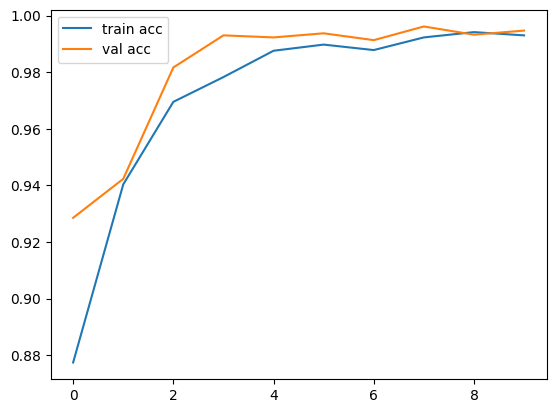

In [31]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image

data_dir = r"E:\sem 5\foml\project\PlantVillage_split"

train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(os.path.join(data_dir, "train"), target_size=(128,128), batch_size=32, class_mode='binary')
val_data = train_datagen.flow_from_directory(os.path.join(data_dir, "val"), target_size=(128,128), batch_size=32, class_mode='binary')


model = Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
MaxPooling2D(2,2),
Conv2D(64,(3,3),activation='relu'),
MaxPooling2D(2,2),
Conv2D(128,(3,3),activation='relu'),
MaxPooling2D(2,2),
Flatten(),
Dense(128,activation='relu'),
Dropout(0.5),
Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[checkpoint, earlystop])

loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", round(acc*100,2), "%")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

def predict_image(img_path):
 img = image.load_img(img_path, target_size=(128,128))
 img_array = image.img_to_array(img)/255.0
 img_array = np.expand_dims(img_array, axis=0)
 pred = model.predict(img_array)[0][0]
 label = "Healthy" if pred < 0.5 else "Unhealthy"
 print(f"Prediction: {label} (Confidence: {round(pred*100,2)}%)")

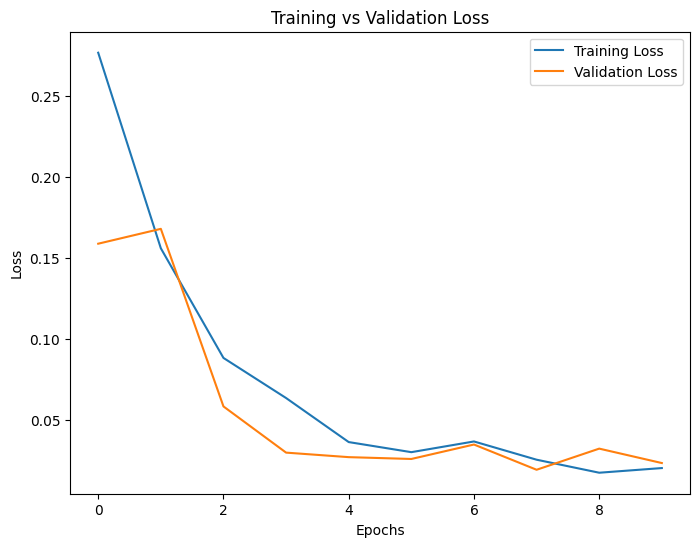

In [32]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
from tensorflow.keras.models import load_model

model = load_model("best_model.keras")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
class_weights = {0: 3.18, 1: 0.59}

history = model.fit(train_data, validation_data=val_data, epochs=10, class_weight=class_weights, callbacks=[checkpoint, earlystop])

Epoch 1/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 223s 427ms/step - accuracy: 0.9848 - loss: 0.0572 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 2/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 189ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9891 - val_loss: 0.0419
Epoch 3/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 189ms/step - accuracy: 0.9908 - loss: 0.0282 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 4/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 188ms/step - accuracy: 0.9906 - loss: 0.0259 - val_accuracy: 0.9942 - val_loss: 0.0238
Epoch 5/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 98s 189ms/step - accuracy: 0.9908 - loss: 0.0284 - val_accuracy: 0.9915 - val_loss: 0.0291


In [35]:
from sklearn.metrics import classification_report
import numpy as np

Y_pred = model.predict(val_data)
y_pred = np.round(Y_pred).astype(int)
print(classification_report(val_data.classes, y_pred))

130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step
              precision    recall  f1-score   support

           0       0.18      0.18      0.18       652
           1       0.85      0.85      0.85      3490

    accuracy                           0.74      4142
   macro avg       0.51      0.51      0.51      4142
weighted avg       0.74      0.74      0.74      4142



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


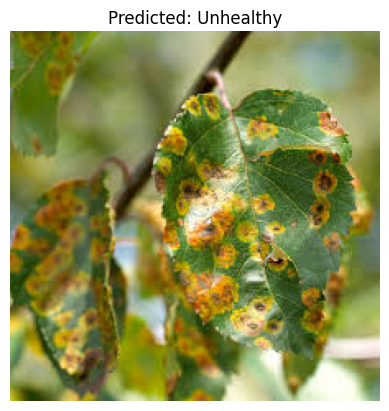

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = r"C:\Users\HP\Downloads\un.jpg"

img = image.load_img(img_path, target_size=(128, 128)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  

prediction = model.predict(img_array)[0][0]  
label = "Unhealthy" if prediction > 0.5 else "healthy"

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()
